In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
#loading dataset
dataset = pd.read_excel('Train_dataset.xlsx')
dataset.head(5)

people_ID        Region  Gender Designation             Name Married  \
0          1  Bhubaneshwar  Female         Mrs            mansi     YES   
1          2  Bhubaneshwar  Female         Mrs        riya masi     YES   
2          3  Bhubaneshwar  Female         Mrs           sunita      NO   
3          4  Bhubaneshwar  Female         Mrs   anjali @ babli     YES   
4          5  Bhubaneshwar  Female         Mrs  champa karketta      NO   

   Children     Occupation Mode_transport  cases/1M  ...    HBB d-dimer  \
0       1.0         Farmer         Public         2  ...   93.0   233.0   
1       2.0         Farmer           Walk         2  ...   56.0   328.0   
2       1.0        Cleaner         Public         2  ...  137.0   213.0   
3       1.0         Driver            Car         2  ...  167.0   275.0   
4       2.0  Manufacturing            Car         2  ...  153.0   331.0   

   Heart rate  HDL cholesterol Charlson Index Blood Glucose  Insurance  \
0        82.0             58.0             27             7  3600000.0   
1        89.0             68.0              5             6  1600000.0   
2        77.0             43.0             40             6  3400000.0   
3        64.0             60.0             27             7   700000.0   
4        71.0             64.0             32             7  3200000.0   

    salary  FT/month  Infect_Prob  
0  1300000       2.0    49.135010  
1   400000       1.0    51.147880  
2   900000       1.0    73.224000  
3  2300000       1.0    48.779225  
4  1100000       1.0    87.868800  

[5 rows x 28 columns]

In [3]:
#to remove restriction in displaying the columns and rows
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [4]:
#checking for null values
dataset.isnull().sum()

people_ID                    0
Region                       0
Gender                       0
Designation                  0
Name                        20
Married                      0
Children                   311
Occupation                 747
Mode_transport               3
cases/1M                     0
Deaths/1M                    0
comorbidity                226
Age                          0
Coma score                   0
Pulmonary score              0
cardiological pressure      97
Diuresis                   716
Platelets                  924
HBB                         16
d-dimer                   1114
Heart rate                1114
HDL cholesterol             35
Charlson Index               0
Blood Glucose                0
Insurance                 1090
salary                       0
FT/month                   723
Infect_Prob                  0
dtype: int64

In [5]:
#filling with most frequent value
dataset['Children'].fillna(0,inplace=True)
dataset['Occupation'].fillna(dataset['Occupation'].mode()[0],inplace=True)
dataset['Mode_transport'].fillna(dataset['Mode_transport'].mode()[0],inplace=True)
dataset['comorbidity'].fillna(dataset['comorbidity'].mode()[0],inplace=True)
dataset['cardiological pressure'].fillna(dataset['cardiological pressure'].mode()[0],inplace=True)
dataset['FT/month'].fillna(dataset['FT/month'].mode()[0],inplace=True)

In [6]:
#filling missing values with mean value
dataset['Diuresis'].fillna(value=np.mean(dataset['Diuresis']),inplace=True)
dataset['Platelets'].fillna(value=np.mean(dataset['Platelets']),inplace=True)
dataset['HBB'].fillna(value=np.mean(dataset['HBB']),inplace=True)
dataset['d-dimer'].fillna(value=np.mean(dataset['d-dimer']),inplace=True)
dataset['Heart rate'].fillna(value=np.mean(dataset['Heart rate']),inplace=True)
dataset['HDL cholesterol'].fillna(value=np.mean(dataset['HDL cholesterol']),inplace=True)

In [7]:
#droping unwanted columns
unwanted_col = ['Name','Designation','Insurance','people_ID']
dataset = dataset.drop(unwanted_col,axis=1)

In [8]:
dataset.head()

Region  Gender Married  Children     Occupation Mode_transport  \
0  Bhubaneshwar  Female     YES       1.0         Farmer         Public   
1  Bhubaneshwar  Female     YES       2.0         Farmer           Walk   
2  Bhubaneshwar  Female      NO       1.0        Cleaner         Public   
3  Bhubaneshwar  Female     YES       1.0         Driver            Car   
4  Bhubaneshwar  Female      NO       2.0  Manufacturing            Car   

   cases/1M  Deaths/1M             comorbidity  Age  Coma score  \
0         2          0            Hypertension   68           8   
1         2          0                Diabetes   64          15   
2         2          0                    None   19          13   
3         2          0  Coronary Heart Disease   33           9   
4         2          0                Diabetes   23           7   

  Pulmonary score cardiological pressure    Diuresis  Platelets    HBB  \
0            <400                 Normal  441.000000      154.0   93.0   
1            <100               Stage-02  278.806261      121.0   56.0   
2            <300               Elevated  416.000000      124.0  137.0   
3            <200               Stage-01  410.000000       98.0  167.0   
4            <400                 Normal  390.000000       21.0  153.0   

   d-dimer  Heart rate  HDL cholesterol  Charlson Index  Blood Glucose  \
0    233.0        82.0             58.0              27              7   
1    328.0        89.0             68.0               5              6   
2    213.0        77.0             43.0              40              6   
3    275.0        64.0             60.0              27              7   
4    331.0        71.0             64.0              32              7   

    salary  FT/month  Infect_Prob  
0  1300000       2.0    49.135010  
1   400000       1.0    51.147880  
2   900000       1.0    73.224000  
3  2300000       1.0    48.779225  
4  1100000       1.0    87.868800

In [9]:
#checking for null values
dataset.isnull().sum()

Region                    0
Gender                    0
Married                   0
Children                  0
Occupation                0
Mode_transport            0
cases/1M                  0
Deaths/1M                 0
comorbidity               0
Age                       0
Coma score                0
Pulmonary score           0
cardiological pressure    0
Diuresis                  0
Platelets                 0
HBB                       0
d-dimer                   0
Heart rate                0
HDL cholesterol           0
Charlson Index            0
Blood Glucose             0
salary                    0
FT/month                  0
Infect_Prob               0
dtype: int64

In [10]:
#Replacing Categorical value
Region = pd.get_dummies(dataset['Region'],drop_first=True)
dataset = pd.concat([dataset,Region],axis = 1)
dataset = dataset.drop(['Region'],axis=1)

In [11]:
Gender = pd.get_dummies(dataset['Gender'],drop_first=True)
dataset = pd.concat([dataset,Gender],axis =1)
dataset = dataset.drop('Gender',axis =1)

In [12]:
dataset['Married'] = dataset['Married'].map({'YES':1,'NO':0})

In [13]:
Occupation = pd.get_dummies(dataset['Occupation'],drop_first=True)
dataset = pd.concat([dataset,Occupation],axis=1)
dataset.drop('Occupation',axis=1,inplace=True)

In [14]:
Transport = pd.get_dummies(dataset['Mode_transport'],drop_first=True)
dataset = pd.concat([dataset,Transport],axis=1)
dataset.drop('Mode_transport',axis=1,inplace=True)

In [15]:
dataset.head()

Married  Children  cases/1M  Deaths/1M             comorbidity  Age  \
0        1       1.0         2          0            Hypertension   68   
1        1       2.0         2          0                Diabetes   64   
2        0       1.0         2          0                    None   19   
3        1       1.0         2          0  Coronary Heart Disease   33   
4        0       2.0         2          0                Diabetes   23   

   Coma score Pulmonary score cardiological pressure    Diuresis  Platelets  \
0           8            <400                 Normal  441.000000      154.0   
1          15            <100               Stage-02  278.806261      121.0   
2          13            <300               Elevated  416.000000      124.0   
3           9            <200               Stage-01  410.000000       98.0   
4           7            <400                 Normal  390.000000       21.0   

     HBB  d-dimer  Heart rate  HDL cholesterol  Charlson Index  Blood Glucose  \
0   93.0    233.0        82.0             58.0              27              7   
1   56.0    328.0        89.0             68.0               5              6   
2  137.0    213.0        77.0             43.0              40              6   
3  167.0    275.0        64.0             60.0              27              7   
4  153.0    331.0        71.0             64.0              32              7   

    salary  FT/month  Infect_Prob  Bhubaneshwar  Chandigarh  Chennai  Delhi  \
0  1300000       2.0    49.135010             1           0        0      0   
1   400000       1.0    51.147880             1           0        0      0   
2   900000       1.0    73.224000             1           0        0      0   
3  2300000       1.0    48.779225             1           0        0      0   
4  1100000       1.0    87.868800             1           0        0      0   

   Male  Cleaner  Clerk  Driver  Farmer  Legal  Manufacturing  Researcher  \
0     0        0      0       0       1      0              0           0   
1     0        0      0       0       1      0              0           0   
2     0        1      0       0       0      0              0           0   
3     0        0      0       1       0      0              0           0   
4     0        0      0       0       0      0              1           0   

   Sales  Public  Walk  
0      0       1     0  
1      0       0     1  
2      0       1     0  
3      0       0     0  
4      0       0     0

In [16]:
Comorbidity  = pd.get_dummies(dataset['comorbidity'],drop_first=True)
dataset = pd.concat([dataset,Comorbidity],axis=1)
dataset.drop('comorbidity',inplace=True,axis=1)

In [17]:
dataset.head()

Married  Children  cases/1M  Deaths/1M  Age  Coma score Pulmonary score  \
0        1       1.0         2          0   68           8            <400   
1        1       2.0         2          0   64          15            <100   
2        0       1.0         2          0   19          13            <300   
3        1       1.0         2          0   33           9            <200   
4        0       2.0         2          0   23           7            <400   

  cardiological pressure    Diuresis  Platelets    HBB  d-dimer  Heart rate  \
0                 Normal  441.000000      154.0   93.0    233.0        82.0   
1               Stage-02  278.806261      121.0   56.0    328.0        89.0   
2               Elevated  416.000000      124.0  137.0    213.0        77.0   
3               Stage-01  410.000000       98.0  167.0    275.0        64.0   
4                 Normal  390.000000       21.0  153.0    331.0        71.0   

   HDL cholesterol  Charlson Index  Blood Glucose   salary  FT/month  \
0             58.0              27              7  1300000       2.0   
1             68.0               5              6   400000       1.0   
2             43.0              40              6   900000       1.0   
3             60.0              27              7  2300000       1.0   
4             64.0              32              7  1100000       1.0   

   Infect_Prob  Bhubaneshwar  Chandigarh  Chennai  Delhi  Male  Cleaner  \
0    49.135010             1           0        0      0     0        0   
1    51.147880             1           0        0      0     0        0   
2    73.224000             1           0        0      0     0        1   
3    48.779225             1           0        0      0     0        0   
4    87.868800             1           0        0      0     0        0   

   Clerk  Driver  Farmer  Legal  Manufacturing  Researcher  Sales  Public  \
0      0       0       1      0              0           0      0       1   
1      0       0       1      0              0           0      0       0   
2      0       0       0      0              0           0      0       1   
3      0       1       0      0              0           0      0       0   
4      0       0       0      0              1           0      0       0   

   Walk  Diabetes  Hypertension  None  
0     0         0             1     0  
1     1         1             0     0  
2     0         0             0     1  
3     0         0             0     0  
4     0         1             0     0

In [18]:
dataset['Pulmonary score'] = dataset['Pulmonary score'].map({'<400':0,'<100':1,'<300':1,'<200':1})

In [19]:
dataset.head()

Married  Children  cases/1M  Deaths/1M  Age  Coma score  Pulmonary score  \
0        1       1.0         2          0   68           8                0   
1        1       2.0         2          0   64          15                1   
2        0       1.0         2          0   19          13                1   
3        1       1.0         2          0   33           9                1   
4        0       2.0         2          0   23           7                0   

  cardiological pressure    Diuresis  Platelets    HBB  d-dimer  Heart rate  \
0                 Normal  441.000000      154.0   93.0    233.0        82.0   
1               Stage-02  278.806261      121.0   56.0    328.0        89.0   
2               Elevated  416.000000      124.0  137.0    213.0        77.0   
3               Stage-01  410.000000       98.0  167.0    275.0        64.0   
4                 Normal  390.000000       21.0  153.0    331.0        71.0   

   HDL cholesterol  Charlson Index  Blood Glucose   salary  FT/month  \
0             58.0              27              7  1300000       2.0   
1             68.0               5              6   400000       1.0   
2             43.0              40              6   900000       1.0   
3             60.0              27              7  2300000       1.0   
4             64.0              32              7  1100000       1.0   

   Infect_Prob  Bhubaneshwar  Chandigarh  Chennai  Delhi  Male  Cleaner  \
0    49.135010             1           0        0      0     0        0   
1    51.147880             1           0        0      0     0        0   
2    73.224000             1           0        0      0     0        1   
3    48.779225             1           0        0      0     0        0   
4    87.868800             1           0        0      0     0        0   

   Clerk  Driver  Farmer  Legal  Manufacturing  Researcher  Sales  Public  \
0      0       0       1      0              0           0      0       1   
1      0       0       1      0              0           0      0       0   
2      0       0       0      0              0           0      0       1   
3      0       1       0      0              0           0      0       0   
4      0       0       0      0              1           0      0       0   

   Walk  Diabetes  Hypertension  None  
0     0         0             1     0  
1     1         1             0     0  
2     0         0             0     1  
3     0         0             0     0  
4     0         1             0     0

In [20]:
dataset['cardiological pressure'] = dataset['cardiological pressure'].map({'Normal':0,'Elevated':0,'Stage-02':1,'Stage-01':1})

In [21]:
dataset.head()

Married  Children  cases/1M  Deaths/1M  Age  Coma score  Pulmonary score  \
0        1       1.0         2          0   68           8                0   
1        1       2.0         2          0   64          15                1   
2        0       1.0         2          0   19          13                1   
3        1       1.0         2          0   33           9                1   
4        0       2.0         2          0   23           7                0   

   cardiological pressure    Diuresis  Platelets    HBB  d-dimer  Heart rate  \
0                       0  441.000000      154.0   93.0    233.0        82.0   
1                       1  278.806261      121.0   56.0    328.0        89.0   
2                       0  416.000000      124.0  137.0    213.0        77.0   
3                       1  410.000000       98.0  167.0    275.0        64.0   
4                       0  390.000000       21.0  153.0    331.0        71.0   

   HDL cholesterol  Charlson Index  Blood Glucose   salary  FT/month  \
0             58.0              27              7  1300000       2.0   
1             68.0               5              6   400000       1.0   
2             43.0              40              6   900000       1.0   
3             60.0              27              7  2300000       1.0   
4             64.0              32              7  1100000       1.0   

   Infect_Prob  Bhubaneshwar  Chandigarh  Chennai  Delhi  Male  Cleaner  \
0    49.135010             1           0        0      0     0        0   
1    51.147880             1           0        0      0     0        0   
2    73.224000             1           0        0      0     0        1   
3    48.779225             1           0        0      0     0        0   
4    87.868800             1           0        0      0     0        0   

   Clerk  Driver  Farmer  Legal  Manufacturing  Researcher  Sales  Public  \
0      0       0       1      0              0           0      0       1   
1      0       0       1      0              0           0      0       0   
2      0       0       0      0              0           0      0       1   
3      0       1       0      0              0           0      0       0   
4      0       0       0      0              1           0      0       0   

   Walk  Diabetes  Hypertension  None  
0     0         0             1     0  
1     1         1             0     0  
2     0         0             0     1  
3     0         0             0     0  
4     0         1             0     0

In [22]:
dataset.columns

Index(['Married', 'Children', 'cases/1M', 'Deaths/1M', 'Age', 'Coma score',
       'Pulmonary score', 'cardiological pressure', 'Diuresis', 'Platelets',
       'HBB', 'd-dimer', 'Heart rate', 'HDL cholesterol', 'Charlson Index',
       'Blood Glucose', 'salary', 'FT/month', 'Infect_Prob', 'Bhubaneshwar',
       'Chandigarh', 'Chennai', 'Delhi', 'Male', 'Cleaner', 'Clerk', 'Driver',
       'Farmer', 'Legal', 'Manufacturing', 'Researcher', 'Sales', 'Public',
       'Walk', 'Diabetes', 'Hypertension', 'None'],
      dtype='object')

In [23]:
dataset1 = pd.read_excel('Train_dataset.xlsx')
dataset1.columns

Index(['people_ID', 'Region', 'Gender', 'Designation', 'Name', 'Married',
       'Children', 'Occupation', 'Mode_transport', 'cases/1M', 'Deaths/1M',
       'comorbidity', 'Age', 'Coma score', 'Pulmonary score',
       'cardiological pressure', 'Diuresis', 'Platelets', 'HBB', 'd-dimer',
       'Heart rate', 'HDL cholesterol', 'Charlson Index', 'Blood Glucose',
       'Insurance', 'salary', 'FT/month', 'Infect_Prob'],
      dtype='object')

In [24]:
dataset1['Mode_transport'].unique()

array(['Public', 'Walk', 'Car', nan], dtype=object)

In [25]:
#reordering all the columns for convenience
columns = ['Bhubaneshwar','Chandigarh', 'Chennai', 'Delhi','Male','Married','Children','Cleaner', 'Clerk', 'Driver',
       'Farmer', 'Legal', 'Manufacturing', 'Researcher', 'Sales','Public','Walk','cases/1M', 'Deaths/1M', 'Age', 'Coma score',
       'Pulmonary score', 'cardiological pressure', 'Diuresis', 'Platelets',
       'HBB', 'd-dimer', 'Heart rate', 'HDL cholesterol', 'Charlson Index',
       'Blood Glucose','FT/month','Infect_Prob']

In [26]:
dataset = dataset[columns]

In [27]:
dataset.head()

Bhubaneshwar  Chandigarh  Chennai  Delhi  Male  Married  Children  Cleaner  \
0             1           0        0      0     0        1       1.0        0   
1             1           0        0      0     0        1       2.0        0   
2             1           0        0      0     0        0       1.0        1   
3             1           0        0      0     0        1       1.0        0   
4             1           0        0      0     0        0       2.0        0   

   Clerk  Driver  Farmer  Legal  Manufacturing  Researcher  Sales  Public  \
0      0       0       1      0              0           0      0       1   
1      0       0       1      0              0           0      0       0   
2      0       0       0      0              0           0      0       1   
3      0       1       0      0              0           0      0       0   
4      0       0       0      0              1           0      0       0   

   Walk  cases/1M  Deaths/1M  Age  Coma score  Pulmonary score  \
0     0         2          0   68           8                0   
1     1         2          0   64          15                1   
2     0         2          0   19          13                1   
3     0         2          0   33           9                1   
4     0         2          0   23           7                0   

   cardiological pressure    Diuresis  Platelets    HBB  d-dimer  Heart rate  \
0                       0  441.000000      154.0   93.0    233.0        82.0   
1                       1  278.806261      121.0   56.0    328.0        89.0   
2                       0  416.000000      124.0  137.0    213.0        77.0   
3                       1  410.000000       98.0  167.0    275.0        64.0   
4                       0  390.000000       21.0  153.0    331.0        71.0   

   HDL cholesterol  Charlson Index  Blood Glucose  FT/month  Infect_Prob  
0             58.0              27              7       2.0    49.135010  
1             68.0               5              6       1.0    51.147880  
2             43.0              40              6       1.0    73.224000  
3             60.0              27              7       1.0    48.779225  
4             64.0              32              7       1.0    87.868800

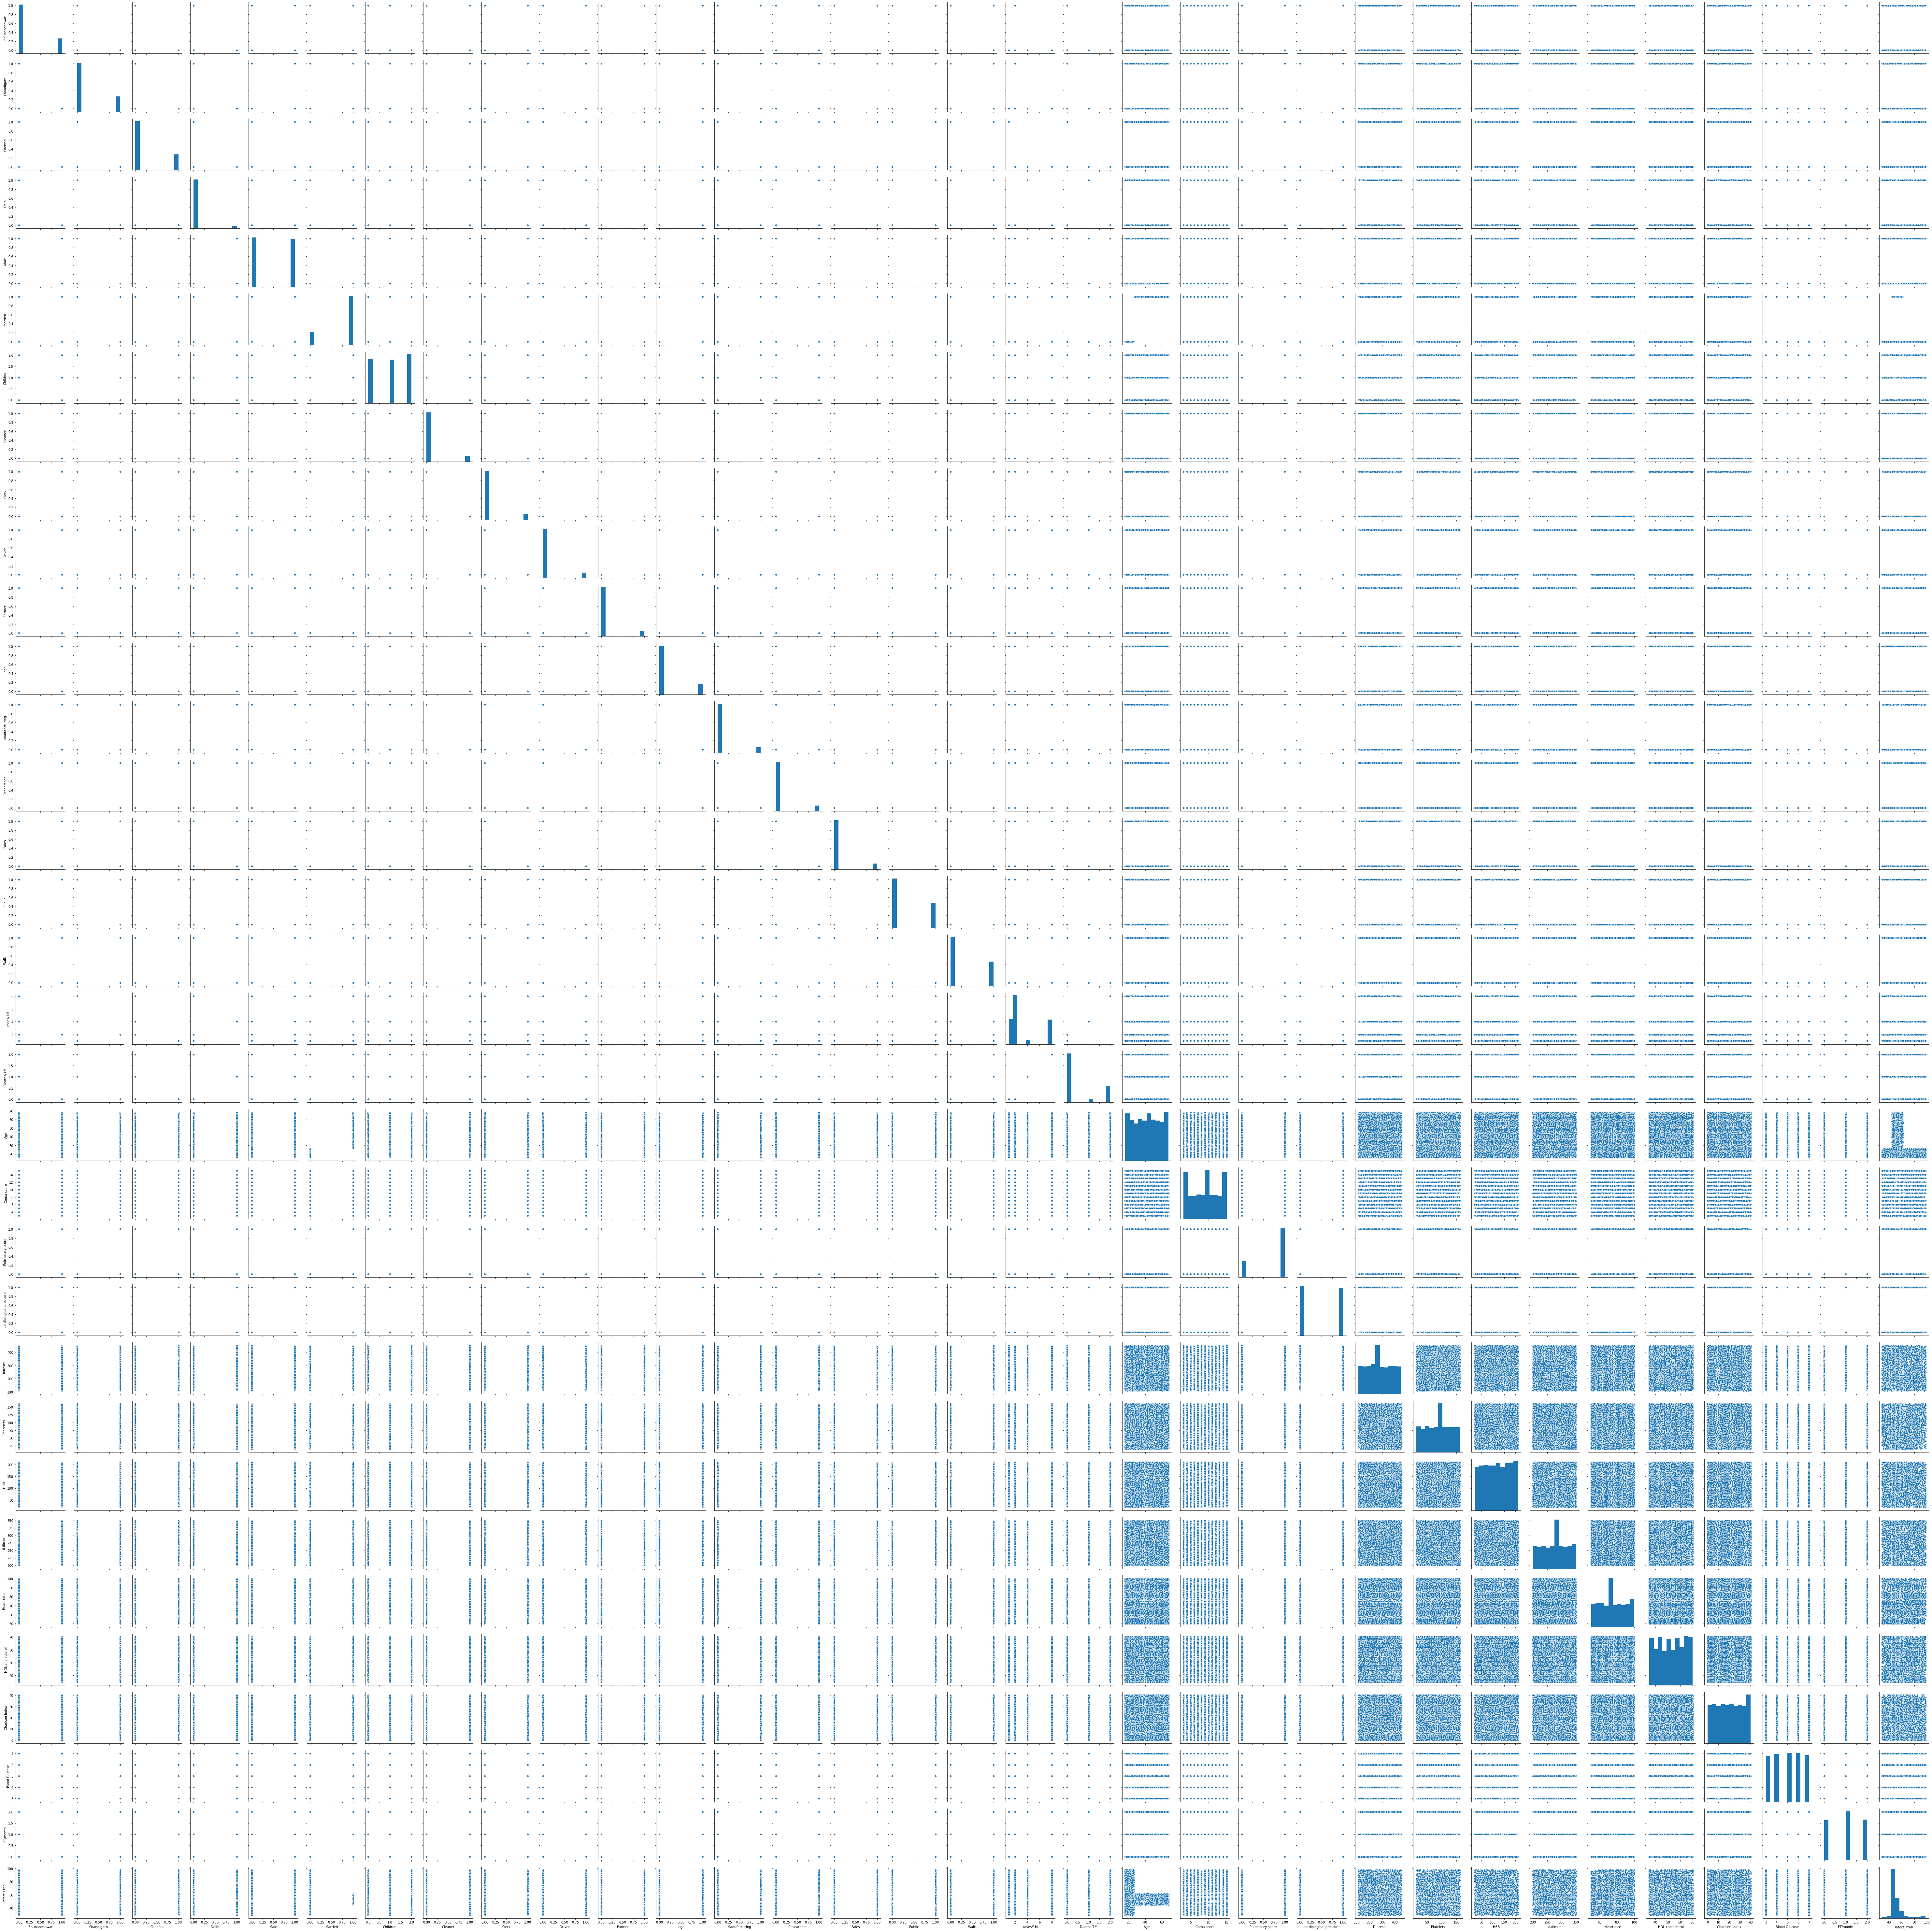

In [28]:
#Analysing the dataset
#pair plot - plot all numerical data against all numerical data
sns.pairplot(dataset)

In [29]:
#dislays each feature correlation to the infected Probability
#top ten highly correlated features
dataset.corr()['Infect_Prob'].sort_values(ascending=False).iloc[1:11]

Deaths/1M          0.174994
cases/1M           0.172871
Children           0.167257
Legal              0.087022
Platelets          0.066289
Coma score         0.038400
Delhi              0.035215
d-dimer            0.021130
HBB                0.019360
HDL cholesterol    0.013284
Name: Infect_Prob, dtype: float64

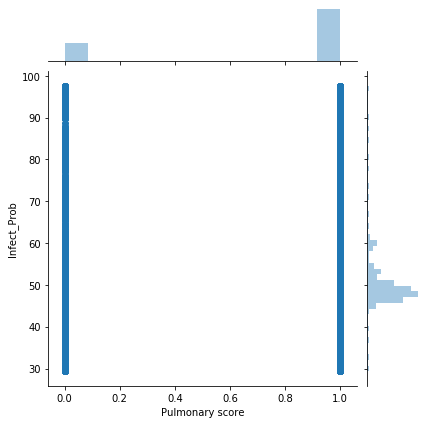

In [30]:
#comparing pulmonary score and Infect_prob
sns.jointplot('Pulmonary score','Infect_Prob',data = dataset)

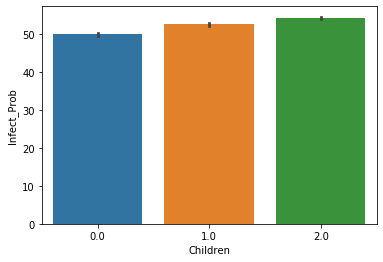

In [31]:
"""from the chart it is clear that those 
who have two children have more infected"""
sns.barplot(x='Children',y='Infect_Prob',data=dataset)

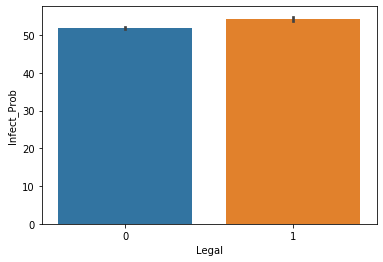

In [32]:
sns.barplot(x='Legal',y='Infect_Prob',data=dataset)#legal has more infected

In [56]:
X = dataset.iloc[:,:-1].values
y = dataset['Infect_Prob'].values

In [57]:
print(X.shape,y.shape)

(10714, 32) (10714,)


In [58]:
#Knowing the important features
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

C:\Users\Jayavanth\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [59]:
print(model.feature_importances_)

[0.01359919 0.01226406 0.00916159 0.00479526 0.02015464 0.21633132
 0.07445387 0.01061656 0.00869747 0.00902094 0.00464621 0.01142889
 0.01118452 0.00931334 0.00911657 0.01798137 0.01763684 0.02653055
 0.02694219 0.05601265 0.04042119 0.01901584 0.01925223 0.04043394
 0.04434434 0.04017677 0.04403857 0.03844309 0.04581016 0.03726731
 0.03383628 0.02707224]


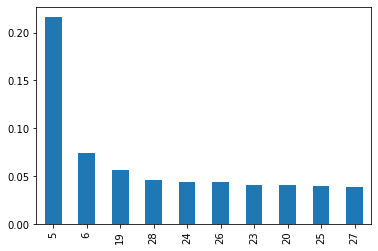

In [61]:
#plotting the important features and choosing the top 6 features
feature_importance = pd.Series(model.feature_importances_)
feature_importance.nlargest(10).plot(kind='bar')

In [62]:
#the features that contribute most to the output
feature_importance.sort_values(ascending=False)

5     0.216331
6     0.074454
19    0.056013
28    0.045810
24    0.044344
26    0.044039
23    0.040434
20    0.040421
25    0.040177
27    0.038443
29    0.037267
30    0.033836
31    0.027072
18    0.026942
17    0.026531
4     0.020155
22    0.019252
21    0.019016
15    0.017981
16    0.017637
0     0.013599
1     0.012264
11    0.011429
12    0.011185
7     0.010617
13    0.009313
2     0.009162
14    0.009117
9     0.009021
8     0.008697
3     0.004795
10    0.004646
dtype: float64

In [63]:
#scaling the dataset
from sklearn.preprocessing import MinMaxScaler
Mn_scaler = MinMaxScaler(feature_range=(0,2))

In [64]:
#spliting the model into train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [65]:
#scaling the dataset
X_train = Mn_scaler.fit_transform(X_train)
X_test = Mn_scaler.transform(X_test)

In [66]:
#creating a neural networks
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [68]:
#adding the layers to the network
model = Sequential()
model.add(Dense(32,activation='relu'))
model.add(Dense(28,activation='relu'))
model.add(Dense(28,activation='relu'))
model.add(Dense(1,activation='relu'))
model.compile(optimizer='adam',loss='mean_squared_error')

In [69]:
model.fit(X_train,y_train,batch_size=64,epochs=25)

Train on 8571 samples
Epoch 1/25
8571/8571 [==============================] - 7s 840us/sample - loss: 1084.4910
Epoch 2/25
8571/8571 [==============================] - 2s 180us/sample - loss: 148.2179
Epoch 3/25
8571/8571 [==============================] - 1s 169us/sample - loss: 112.1930
Epoch 4/25
8571/8571 [==============================] - 2s 185us/sample - loss: 102.6995
Epoch 5/25
8571/8571 [==============================] - 2s 177us/sample - loss: 96.9243
Epoch 6/25
8571/8571 [==============================] - 2s 179us/sample - loss: 93.1164
Epoch 7/25
8571/8571 [==============================] - 1s 165us/sample - loss: 88.4057
Epoch 8/25
8571/8571 [==============================] - 1s 174us/sample - loss: 85.4963
Epoch 9/25
8571/8571 [==============================] - 1s 173us/sample - loss: 83.1318
Epoch 10/25
8571/8571 [==============================] - 2s 187us/sample - loss: 81.5131
Epoch 11/25
8571/8571 [==============================] - 2s 192us/sample - loss: 79.9792
Epo

In [70]:
y_pred = model.predict(X_test)

In [74]:
y_pred

array([[51.35943 ],
       [49.243927],
       [56.617752],
       ...,
       [48.530342],
       [46.889893],
       [46.71633 ]], dtype=float32)

In [75]:
y_test

array([51.39411697, 49.27021089, 30.26592   , ..., 49.28552797,
       48.58098652, 47.04782964])

In [76]:
result = pd.Series([y_pred,y_test],index=['prediction','original'])

In [79]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,y_pred))

82.72991393107625
